In [37]:
import cv2
import numpy as np

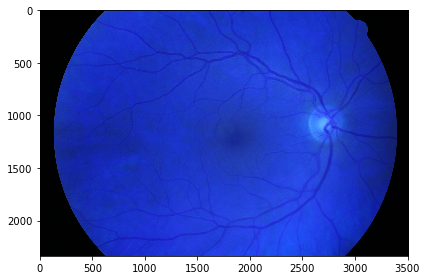

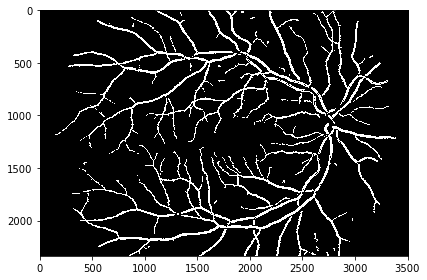

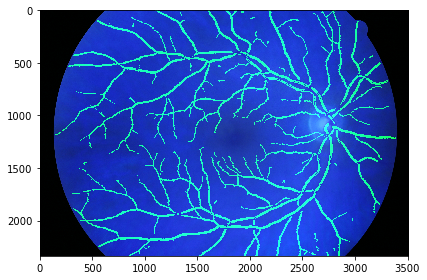

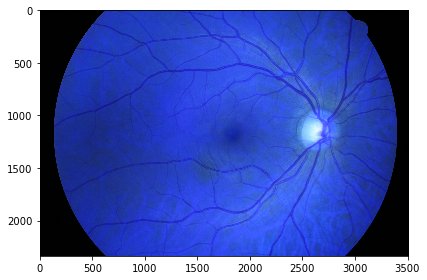

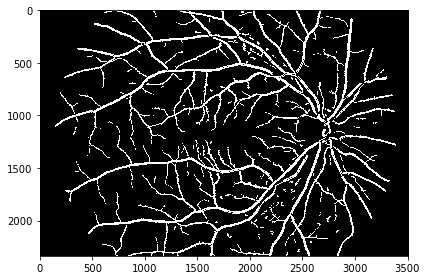

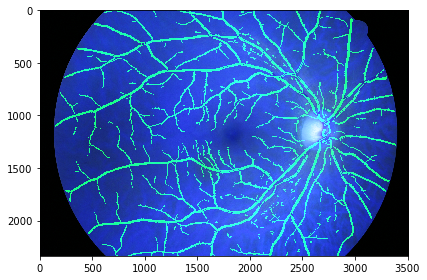

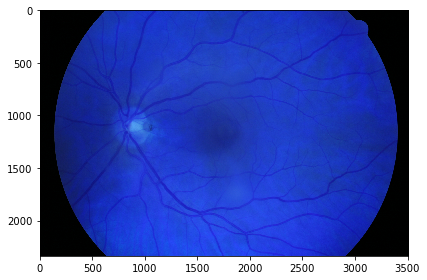

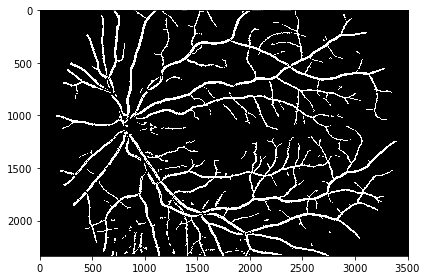

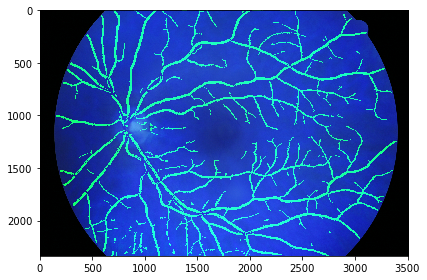

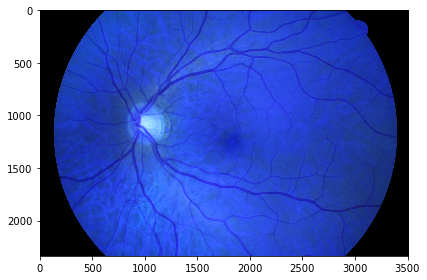

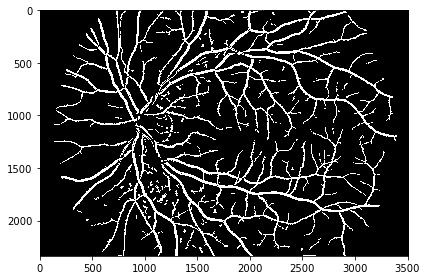

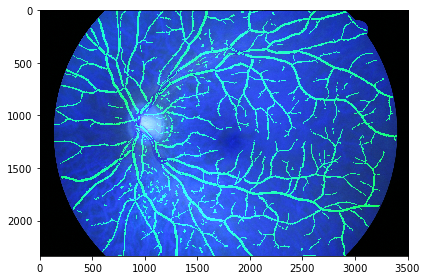

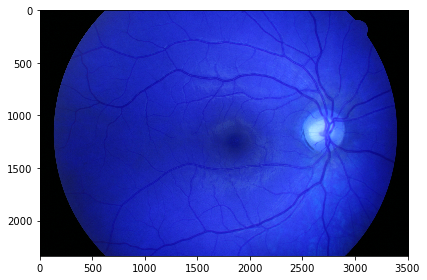

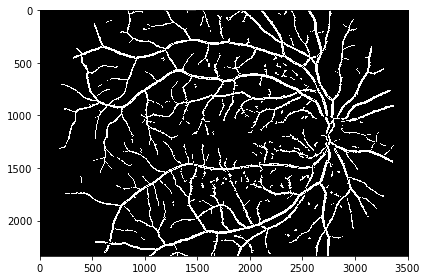

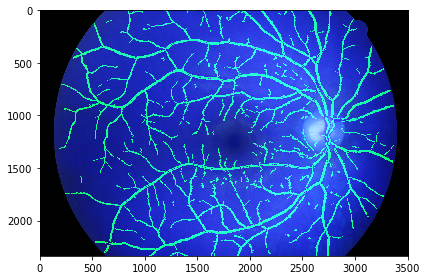

In [56]:
def print_partial_result(image):
    plt.figure()
    io.imshow(image)
    plt.show()

def list_image(dir_path="images/", mask_path="mask/"):
    image_list = []
    image_list.append("01_g")
    image_list.append("01_h")
    image_list.append("02_g")
    image_list.append("02_h")
    image_list.append("03_h")
    image_paths =  [os.path.join(dir_path, file+".jpg") for file in image_list]
    return [cv2.imread(image_path, cv2.IMREAD_COLOR)for image_path in image_paths]

def morphology(image, radius):
    image = cv2.morphologyEx(image, cv2.MORPH_OPEN,
                          cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (radius, radius)), iterations=1)
    return cv2.morphologyEx(image, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (radius, radius)),
 iterations=1)

def prepare_image(image):
    b, image, r = cv2.split(image)
    # print_partial_result(image)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    prepared_image = clahe.apply(image)
    background = morphology(prepared_image, 5)
    background = morphology(background, 15)
    background = morphology(background, 25)
    prepared_image = cv2.subtract(background, prepared_image)
    prepared_image = clahe.apply(prepared_image)
    # print_partial_result(prepared_image)

    _, transformed_image = cv2.threshold(prepared_image, 15, 255, cv2.THRESH_BINARY)
    mask = np.ones(prepared_image.shape[:2], dtype="uint8") * 255
    contours, _ = cv2.findContours(transformed_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) <= 200:
            cv2.drawContours(mask, [cnt], -1, 0, -1)
    prepared_image = cv2.bitwise_and(prepared_image, mask)
    _, prepared_image = cv2.threshold(prepared_image, 15, 255, cv2.THRESH_BINARY)
    prepared_image = cv2.dilate(prepared_image, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)), iterations=1)
    # print_partial_result(prepared_image)
    return prepared_image

if __name__ == '__main__':
    for i,image in enumerate(list_image()): 
        plt.figure(0)
        io.imshow(image)
        plt.figure(1)
        prepared_image = prepare_image(image)
        io.imshow(prepared_image)
        plt.figure(2)
        b, g, r = cv2.split(image)
        new_image=image.copy()
        new_image[:,:,1] = cv2.add(g,prepared_image)
        io.imshow(new_image)
        plt.show()